## How many of the Top 200 songs occur on both the US and Global charts? 

### Timeframe: past 52 weeks

Observations:
- 829 songs are common across both charts
-- This comprises 64% of the US chart and 72% of the Global chart
- Although the US has fewer common songs in the Top 200, the common songs comprise a large percent of streams
-- Common songs comprise 90% of streams in the US and 84% of streams globally
-- Question:  Are there songs on either chart with high streams that do not cross over to the other chart?
-- Question:  If there are such songs, what differentiates them from songs that cross over?
- There appear to be two different types of songs that are common to both charts:
-- Those with a high correlation of weeks in the chart (globally popular) and those with no correlation
-- Question: What are the attributes that distinguish the two subsets?

Additional questions:
- Is there a time factor indicating direction of influence (timing of when common songs show up on one chart vs the other)?


In [1]:
# Dependencies and 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import linregress

# data files
US_path = "Combined CSVs/US_combined.csv"
Global_path = "Combined CSVs/Global_combined.csv"

# Read the mouse data and the study results
us_data = pd.read_csv(US_path)
global_data = pd.read_csv(Global_path)


In [2]:
# create unique Artist Track field and display column headers in US data
us_data["ArtistTrack"] = us_data["Artist"] + us_data["Track Name"]
us_data.head()

,Position,Track Name,Artist,Streams,URL,Date,Unique ID,ArtistTrack
0,1,The Box,Roddy Ricch,12533419,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,01.02.20,01.02.20_001,Roddy RicchThe Box
1,2,ROXANNE,Arizona Zervas,9844160,https://open.spotify.com/track/696DnlkuDOXcMAn...,01.02.20,01.02.20_002,Arizona ZervasROXANNE
2,3,Circles,Post Malone,7932216,https://open.spotify.com/track/21jGcNKet2qwijl...,01.02.20,01.02.20_003,Post MaloneCircles
3,4,BOP,DaBaby,7560429,https://open.spotify.com/track/6Ozh9Ok6h4Oi1wU...,01.02.20,01.02.20_004,DaBabyBOP
4,5,Falling,Trevor Daniel,7197448,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,01.02.20,01.02.20_005,Trevor DanielFalling


In [3]:
# temp - value counts to determine if there are headers in the data rows
us_data["Position"].value_counts()

71          52
158         52
94          52
16          52
188         52
            ..
110         52
73          52
82          52
40          52
Position    51
Name: Position, Length: 201, dtype: int64

In [4]:
# temp
# drop headers in data and convert Streams to integer - US data
#
us_data.drop(us_data[us_data.Position == "Position"].index, inplace=True)
us_data["Position"] = us_data["Position"].astype(int)
us_data["Streams"] = us_data["Streams"].astype(int)
us_data["Artist"] = us_data["Artist"].str.replace('$','S')
us_data["Track Name"] = us_data["Track Name"].str.replace('$','S')

print (f"Records in US data after dropping duplicate headers: {len(us_data)}")
us_data.dtypes

Records in US data after dropping duplicate headers: 10400


Position        int32
Track Name     object
Artist         object
Streams         int32
URL            object
Date           object
Unique ID      object
ArtistTrack    object
dtype: object

In [5]:
# temp - display record counts and data types of rows in US data
print (f"Records in Global data: {len(global_data)}")
global_data.dtypes

Records in Global data: 10451


Position      object
Track Name    object
Artist        object
Streams       object
URL           object
Date          object
Unique ID     object
dtype: object

In [6]:
# create unique Artist Track field and display column headers in Global data
global_data["ArtistTrack"] = global_data["Artist"] + global_data["Track Name"]
global_data.head()

,Position,Track Name,Artist,Streams,URL,Date,Unique ID,ArtistTrack
0,1,Dance Monkey,Tones And I,50183626,https://open.spotify.com/track/1rgnBhdG2JDFTbY...,01.02.20,01.02.20_001,Tones And IDance Monkey
1,2,ROXANNE,Arizona Zervas,33254585,https://open.spotify.com/track/696DnlkuDOXcMAn...,01.02.20,01.02.20_002,Arizona ZervasROXANNE
2,3,Tusa,KAROL G,29349573,https://open.spotify.com/track/7k4t7uLgtOxPwTp...,01.02.20,01.02.20_003,KAROL GTusa
3,4,Memories,Maroon 5,26067853,https://open.spotify.com/track/2b8fOow8UzyDFAE...,01.02.20,01.02.20_004,Maroon 5Memories
4,5,Falling,Trevor Daniel,25901488,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,01.02.20,01.02.20_005,Trevor DanielFalling


In [7]:
# temp - value counts to determine if there are headers in the data rows
global_data["Position"].value_counts()

71          52
158         52
94          52
16          52
188         52
            ..
110         52
73          52
82          52
40          52
Position    51
Name: Position, Length: 201, dtype: int64

In [8]:
# temp
# drop headers in data and convert Streams to integer - Global data
global_data.drop(global_data[global_data.Position == "Position"].index, inplace=True)
global_data["Position"] = global_data["Streams"].astype(int)
global_data["Streams"] = global_data["Streams"].astype(int)
global_data["Artist"] = global_data["Artist"].str.replace('$','S')
global_data["Track Name"] = global_data["Track Name"].str.replace('$','S')


print (f"Records in US data after dropping duplicate headers: {len(global_data)}")
global_data.dtypes

Records in US data after dropping duplicate headers: 10400


Position        int32
Track Name     object
Artist         object
Streams         int32
URL            object
Date           object
Unique ID      object
ArtistTrack    object
dtype: object

In [9]:
print("Input counts:")
us_data_recs_in = len(us_data)
global_data_recs_in = len(global_data)
print(f"rows in us: {us_data_recs_in}")
print(f"rows in global: {global_data_recs_in}")

us_dates_in = us_data["Date"].value_counts()
global_dates_in = global_data["Date"].value_counts()
print(f"unique dates in us: {len(us_dates_in)}")
print(f"unique dates in global: {len(global_dates_in)}")
     

Input counts:
rows in us: 10400
rows in global: 10400
unique dates in us: 52
unique dates in global: 52


In [10]:
# get current date and format to compare to date from input (mm.dd.yy)

#
# Don't think I need this cell, but keep for the time being - pull into reference do for future use
#


full_year = datetime.today().strftime('%Y')
month_day = datetime.today().strftime('%m.%d')

# examples for confirming how string parsing works - keep in place for the time being
month_day2 = month_day[2:]
month_day3 = month_day[:3]
#print (f"month_day: {month_day}")
#print (f"month_day2: {month_day2}")
#print (f"month_day3: {month_day3}")

todays_date = f"{month_day}.{full_year[2:]}"
print (todays_date)

11.01.20


In [11]:
# Get date to use for pulling last 2 months of data
#print(datetime.today())
print (datetime.today() + timedelta(days=-60))

compare_year = (datetime.today() + timedelta(days=-60)).strftime('%Y')
compare_month_day = (datetime.today() + timedelta(days=-60)).strftime('%m.%d')

compare_date = f"{compare_year[2:]}.{compare_month_day}"
print(compare_date)


2020-09-02 20:33:30.901674
20.09.02


In [72]:
# reformat date from input for sorting/comparison

# US Data
us_data["year"] = [x.strip()[-2:] for x in us_data['Date']]
# strip [5:] does the same thing as strip [-2:] with the Date field, use [:5] to pull first 5 characters
# keep for now but move to reference doc for future use
#us_data["month_day"] = [x.strip()[5:] for x in us_data['Date']]
us_data["month_day"] = [x.strip()[:5] for x in us_data['Date']]
us_data["reformatted date"] = us_data["year"] + "." + us_data["month_day"]

# Global Data
global_data['Date'] = global_data['Date'].astype(str)
global_data["year"] = [x.strip()[-2:] for x in global_data['Date']]
global_data["month_day"] = [x.strip()[:5] for x in global_data['Date']]
global_data["reformatted date"] = global_data["year"] + "." + global_data["month_day"]

global_data.tail()

,Position,Track Name,Artist,Streams,URL,Date,Unique ID,ArtistTrack,year,month_day,reformatted date
10446,5560742,VIBEZ,DaBaby,5560742,https://open.spotify.com/track/0fySG6A6qLE8IvD...,12.26.19,12.26.19_196,DaBabyVIBEZ,19,12.26,19.12.26
10447,5548309,Take What You Want (feat. Ozzy Osbourne & Trav...,Post Malone,5548309,https://open.spotify.com/track/7CZyCXKG6d5ALeq...,12.26.19,12.26.19_197,Post MaloneTake What You Want (feat. Ozzy Osbo...,19,12.26,19.12.26
10448,5525805,July,Noah Cyrus,5525805,https://open.spotify.com/track/5a6pdCHlWS2ekOO...,12.26.19,12.26.19_198,Noah CyrusJuly,19,12.26,19.12.26
10449,5502509,QUE PRETENDES,J Balvin,5502509,https://open.spotify.com/track/25ZAibhr3bdlMCL...,12.26.19,12.26.19_199,J BalvinQUE PRETENDES,19,12.26,19.12.26
10450,5453653,Family,The Chainsmokers,5453653,https://open.spotify.com/track/3TKpJrY9q49Mj1J...,12.26.19,12.26.19_200,The ChainsmokersFamily,19,12.26,19.12.26


In [13]:
print("Counts after date conversion:")
print("")

us_data_recs_chk1 = len(us_data)
global_data_recs_chk1 = len(global_data)
print(f"rows in us: {us_data_recs_chk1}")
print(f"rows in global: {global_data_recs_chk1}")

us_dates_chk1 = us_data["Date"].value_counts()
global_dates_chk1 = global_data["Date"].value_counts()
print(f"unique dates in us: {len(us_dates_chk1)}")
print(f"unique dates in global: {len(global_dates_chk1)}")



Counts after date conversion:

rows in us: 10400
rows in global: 10400
unique dates in us: 52
unique dates in global: 52


In [14]:
# sanity check

us_recs_aft_cnv = len(us_data["Date"].value_counts())
global_recs_aft_cnv = len(global_data["Date"].value_counts())

#print(f"unique dates in us after date conversion: {len(len(us_data["Date"].value_counts())}")
print(f"unique dates in us after conversion: {us_recs_aft_cnv}")
print(f"unique dates in global after conversion: {global_recs_aft_cnv}")

us_data_recs_1 = len(us_data)
global_data_recs_1 = len(global_data)
print(f"rows in us: {us_data_recs_1}")
print(f"rows in global: {global_data_recs_1}")

us_dates_1 = us_data["Date"].value_counts()
global_dates_1 = global_data["Date"].value_counts()
print(f"unique dates in us: {len(us_dates_1)}")
print(f"unique dates in global: {len(global_dates_1)}")

unique dates in us after conversion: 52
unique dates in global after conversion: 52
rows in us: 10400
rows in global: 10400
unique dates in us: 52
unique dates in global: 52


In [15]:
# Identify unique song/artists from the past 2 months: US & Global
# For each unique song/artist identify min & max position and total streams
# What's the total population of unique song/artists in each dataset?
# How many unique song/artists are common between datasets?
# What percent of total dataset do the common song/artists comprise?
# Does statistical analysis of the datasets provide insight?

In [16]:
# create summary dataframes for comparing US to Global

us_groupby = us_data.groupby(["ArtistTrack"])
us_track_df = pd.DataFrame(us_groupby["Artist"].max())
us_track_df["Track Name"] = us_groupby["Track Name"].max()
us_track_df["Weeks in Top 200"] = us_groupby["Position"].count()
us_track_df["Top Position"] = us_groupby["Position"].min()
us_track_df["Low Position"] = us_groupby["Position"].max()
us_track_df["Total Streams"] = us_groupby["Streams"].sum()

global_groupby = global_data.groupby(["ArtistTrack"])
global_track_df = pd.DataFrame(global_groupby["Artist"].max())
global_track_df["Track Name"] = global_groupby["Track Name"].max()
global_track_df["Weeks in Top 200"] = global_groupby["Position"].count()
global_track_df["Top Position"] = global_groupby["Position"].min()
global_track_df["Low Position"] = global_groupby["Position"].max()
global_track_df["Total Streams"] = global_groupby["Streams"].sum()

global_track_df.head()

,Artist,Track Name,Weeks in Top 200,Top Position,Low Position,Total Streams
ArtistTrack,,,,,,
"*NSYNCMerry Christmas, Happy Holidays",*NSYNC,"Merry Christmas, Happy Holidays",1,7972211,7972211,7972211
13 OrganiséBande organisée,13 Organisé,Bande organisée,2,5112572,5706019,10818591
21 SavageBrand New Draco,21 Savage,Brand New Draco,1,5841110,5841110,5841110
21 SavageGlock In My Lap,21 Savage,Glock In My Lap,2,4947593,10620418,15568011
21 SavageImmortal,21 Savage,Immortal,3,4851870,7793151,18191033


In [17]:
# create dataframe of songs common to both charts
common_track_df = pd.merge(us_track_df, global_track_df, how='inner', on='ArtistTrack', suffixes=('_US', '_GL'))
common_track_df.head()

,Artist_US,Track Name_US,Weeks in Top 200_US,Top Position_US,Low Position_US,Total Streams_US,Artist_GL,Track Name_GL,Weeks in Top 200_GL,Top Position_GL,Low Position_GL,Total Streams_GL
ArtistTrack,,,,,,,,,,,,
"*NSYNCMerry Christmas, Happy Holidays",*NSYNC,"Merry Christmas, Happy Holidays",2,97,162,4842125,*NSYNC,"Merry Christmas, Happy Holidays",1,7972211,7972211,7972211
21 SavageBrand New Draco,21 Savage,Brand New Draco,1,35,35,3514669,21 Savage,Brand New Draco,1,5841110,5841110,5841110
21 SavageGlock In My Lap,21 Savage,Glock In My Lap,3,8,57,11432489,21 Savage,Glock In My Lap,2,4947593,10620418,15568011
21 SavageImmortal,21 Savage,Immortal,13,14,165,33623180,21 Savage,Immortal,3,4851870,7793151,18191033
21 SavageMany Men,21 Savage,Many Men,3,15,186,8435954,21 Savage,Many Men,1,8675173,8675173,8675173


In [18]:
def print_scatterchart(x_axis, y_axis, title, x_label, y_label):
    
    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="darkblue")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [19]:
def print_scatter_and(x_axis, y_axis, title, x_label, y_label):
# print scatter charter and regression analsysi

    # make x_axis amenable to calculation of regression values
    x_axis = np.asarray(x_axis)
    
    # run linregress to get components for correlaton coefficient and regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,  y_axis)
    regress_values = x_axis * slope + intercept

    # calc correlation coefficient and format regression model equation
    correlation_coefficient = round(rvalue**2, 2)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # figure out where to place the regression model equation
    test_val = (slope*max(x_axis) + intercept) - (slope*min(x_axis) + intercept)
    x_pos = min(x_axis)
    if test_val > 0:
        if max(y_axis) > 25:
            y_pos = max(y_axis) - 5
        else:
            y_pos = max(y_axis) - 1
    else:
        if max(y_axis) > 25:
            y_pos = min(y_axis) + 5
        else:
            y_pos = min(y_axis) + 1

    # format and print plot
    fig = plt.figure()
    plt.scatter(x_axis, y_axis, marker="o", facecolors="#79abcd")
    plt.plot(x_axis,regress_values,"#f70d30")
    plt.annotate(line_eq,(x_pos,y_pos),fontsize=15,color="#f70d30",fontweight="bold")
    fig.suptitle(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f'Correlation coefficient = {correlation_coefficient}')
    print('')

In [20]:
# calculate total streams
one_billion = 1000000000
one_million = 1000000

# calculate raw totals
total_streams_US = us_track_df["Total Streams"].sum()
total_streams_GL = global_track_df["Total Streams"].sum()
total_common_streams_US = common_track_df["Total Streams_US"].sum()
total_common_streams_GL = common_track_df["Total Streams_GL"].sum()
total_unique_streams_US = total_streams_US - total_common_streams_US
total_unique_streams_GL = total_streams_GL - total_common_streams_GL

# calculate print totals
# US total streams
if total_streams_US > one_billion:
    denominator = one_billion
    stream_label_US = "billion"
else:    
    denominator = one_million
    stream_label_US = "million"

total_streams_US_f = float("{:.1f}".format(total_streams_US / denominator))
common_streams_US_f = float("{:.1f}".format(total_common_streams_US / denominator))
total_unique_streams_US_f = float("{:.1f}".format(total_unique_streams_US / denominator))


# Global total streams
if total_streams_GL > one_billion:
    denominator = one_billion
    stream_label_GL = "billion"
else:    
    denominator = one_million
    stream_label_GL = "million"

total_streams_GL_f = float("{:.1f}".format(total_streams_GL / denominator))
common_streams_GL_f = float("{:.1f}".format(total_common_streams_GL / denominator))
total_unique_streams_GL_f = float("{:.1f}".format(total_unique_streams_GL / denominator))

streams_bars_df = pd.DataFrame({"US":[total_common_streams_US, total_unique_streams_US],
                                "Global":[total_common_streams_GL, total_unique_streams_GL]})

#print(total_streams_GL)
#print(total_streams_GL_f)
#print(total_common_streams_GL)
#print(common_streams_GL_f)
#print(total_unique_streams_GL)
#print(total_unique_streams_GL_f)
#streams_bars_df.dtypes


In [21]:
# calculate song counts
total_songs_US = len(us_track_df)
total_songs_GL = len(global_track_df)
total_songs_common = len(common_track_df)

total_unique_songs_US = total_songs_US - total_songs_common
total_unique_songs_GL = total_songs_GL - total_songs_common

print(total_unique_songs_GL)
print(total_songs_common)
print(total_songs_GL)


311
829
1140


In [56]:
# calculate percentages
common_streams_pct_US = float("{:.1f}".format((total_common_streams_US / total_streams_US) * 100))
unique_streams_pct_US = float("{:.1f}".format(100 - common_streams_pct_US))

common_streams_pct_GL = float("{:.1f}".format((total_common_streams_GL / total_streams_GL) * 100))
unique_streams_pct_GL = float("{:.1f}".format(100 - common_streams_pct_GL))

common_songs_pct_US = float("{:.1f}".format((total_songs_common / total_songs_US) * 100))
unique_songs_pct_US = float("{:.1f}".format(100 - common_songs_pct_US))

common_songs_pct_GL = float("{:.1f}".format((total_songs_common / total_songs_GL) * 100))
unique_songs_pct_GL = float("{:.1f}".format(100 - common_songs_pct_GL))

The US Top 200 chart contains 1302 songs totaling 28.8 billion streams
The Global Top 200 chart contains 1140 songs totaling 93.3 billion streams
829 songs are common across both charts

The artist with the most songs on both charts is Lil Uzi Vert with 33 songs
There were 26 songs that stayed in the US Top 200 for 52 weeks
There were 23 songs that stayed in the Global Top 200 for 52 weeks
There were 13 songs that stayed in the both charts for 52 weeks


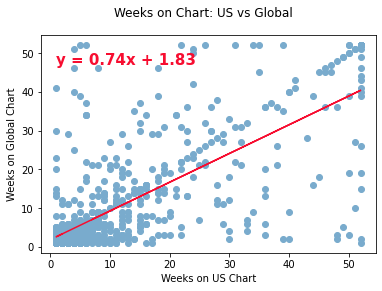

Correlation coefficient = 0.56




In [30]:
print(f"The US Top 200 chart contains {total_songs_US} songs totaling {total_streams_US_f} {stream_label_US} streams")
print(f"The Global Top 200 chart contains {len(global_track_df)} songs totaling {total_streams_GL_f} {stream_label_GL} streams")
print(f"{total_songs_common} songs are common across both charts")
print("")

Artist_with_most_songs = common_track_df["Artist_US"].mode()
if len(Artist_with_most_songs) == 1:
    ArtistX = Artist_with_most_songs[0]
    SongsX_df = common_track_df.loc[common_track_df["Artist_US"] == Artist_with_most_songs[0]]
    print(f"The artist with the most songs on both charts is {Artist_with_most_songs[0]} with {len(SongsX_df)} songs")

# Identify songs with longest run in each chart
longest_run_US = common_track_df["Weeks in Top 200_US"].max()
longest_run_GL = common_track_df["Weeks in Top 200_GL"].max()
longest_run_songs_US_df = common_track_df.loc[common_track_df["Weeks in Top 200_US"] == longest_run_US]
longest_run_songs_GL_df = common_track_df.loc[common_track_df["Weeks in Top 200_GL"] == longest_run_GL]

print(f"There were {len(longest_run_songs_US_df)} songs that stayed in the US Top 200 for {longest_run_US} weeks")
print(f"There were {len(longest_run_songs_GL_df)} songs that stayed in the Global Top 200 for {longest_run_US} weeks")

common_longest_df = pd.merge(longest_run_songs_US_df, longest_run_songs_GL_df, how='inner', on='ArtistTrack')
len(common_longest_df)

if longest_run_US > longest_run_GL:
    print(f"There were {len(common_longest_df)} songs that stayed in the both charts for {longest_run_US} weeks")
else:
    print(f"There were {len(common_longest_df)} songs that stayed in the both charts for {longest_run_GL} weeks")

# Weeks on US chart vs Weeks on Global chart - common songs
print_scatter_and(common_track_df["Weeks in Top 200_US"], common_track_df["Weeks in Top 200_GL"], "Weeks on Chart: US vs Global", "Weeks on US Chart", "Weeks on Global Chart")
print("")

In [ ]:
# Observation:  Correlation of weeks on chart for common songs in general is not strong
#               but there appears to be a subset of that have a very high correlation    
# Question: Are there common attributes of the subset?  Could these be indicators of a song crossing over to another chart?
#
# Observation:  There are songs that have little to no correlation
# Question: Are there attributes that indicate that a song will not cross over to another chart (e.g, language)
# 

US common songs 63.7%, unique songs 36.3%
Global common songs 72.7%, unique songs 27.3%


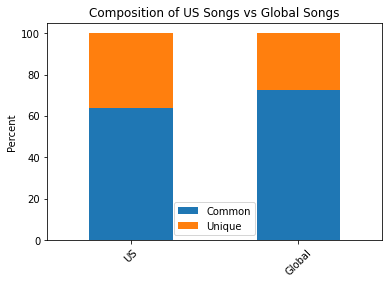

In [77]:
# Compare US Streams to Global Songs
songs_bars_df = pd.DataFrame({"Common":[common_songs_pct_US, common_songs_pct_GL],
                              "Unique":[unique_songs_pct_US, unique_songs_pct_GL]})
labels = ["US","Global"]
ax = songs_bars_df.plot.bar(stacked=True,title="Composition of US Songs vs Global Songs")
ax.set_xticklabels(labels,rotation=45)
ax.set_ylabel("Percent")

print(f"US common songs {common_songs_pct_US}%, unique songs {unique_songs_pct_US}%")
print(f"Global common songs {common_songs_pct_GL}%, unique songs {unique_songs_pct_GL}%")


US common streams 89.6%, unique streams 10.4%
Global common streams 83.6%, unique streams 16.4%


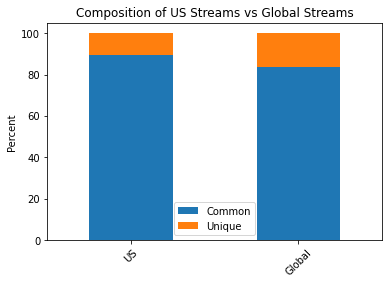

In [76]:
# Compare US Streams to Global Streams
streams_bars_df = pd.DataFrame({"Common":[common_streams_pct_US, common_streams_pct_GL],
                                "Unique":[unique_streams_pct_US, unique_streams_pct_GL]})
labels = ["US","Global"]
ax = streams_bars_df.plot.bar(stacked=True,title="Composition of US Streams vs Global Streams")
ax.set_xticklabels(labels,rotation=45)
ax.set_ylabel("Percent")

print(f"US common streams {common_streams_pct_US}%, unique streams {unique_streams_pct_US}%")
print(f"Global common streams {common_streams_pct_GL}%, unique streams {unique_streams_pct_GL}%")


In [ ]:
# Observation:  US songs comprise a smaller percent of songs in the Top 200, but a larger percent of streams
# Question: How valid an indicator is stream counts that a song from the US Top 200 will appear in the Global Top 200?
#           Of songs in the US Top 200 with high stream counts, how many cross into the Global Top 200?
# Question: Is there and observable time factor between when a common song appears on one vs the other chart?
#           Who is the influencer?
